# <b>Predictive Analysis on Titanic Survival Rates</b>

This notebook was developped based on the Linkedin Learning course of *__Derek Jedamski__*

[Applied Machine Learning: Algorithms](https://www.linkedin.com/learning-login/share?account=2123436&forceAccount=false&redirect=https%3A%2F%2Fwww.linkedin.com%2Flearning%2Fapplied-machine-learning-algorithms%3Ftrk%3Dshare_ent_url%26shareId%3DvksPfqoWRtCxvferFy%252F4Cg%253D%253D)

## <b>Introduction</b>

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On its maiden voyage in April 1912, the widely considered "unsinkable" Titanic sank after colliding with an iceberg. Out of the 2,224 passengers and crew members aboard, more than 1,500 lost their lives in the disaster. The tragedy serves as a profound testament to the unpredictabilities of life and the importance of safety precautions.

While the unfortunate event is etched in history for its colossal loss of life, it also provides a unique dataset for us to understand factors that might have influenced the chances of survival for those onboard. It's widely known that certain groups, such as women, children, and the upper-class, had higher survival rates due to prioritized access to lifeboats. However, can we quantify these chances based on the given data? Can we predict, with a degree of accuracy, who would survive based on parameters like age, gender, class, etc.?

In this study, we will delve deep into the Titanic dataset obtained from the Kaggle competition. By analyzing information about the 891 passengers from the training set, our goal is to develop predictive models to determine the survival outcomes. The models will be built using a range of algorithms including `Linear Regression`, `Support Vector Machines (SVM)`, `Multi-Layer Perceptron (MLP)`, `Random Forest (RF)`, and `Boosting`. By comparing the performance of each model, we aim to determine the most effective algorithm for this specific prediction task. Join us as we embark on this analytical journey to decipher the patterns from one of history's most tragic maritime disasters

## <b>Prepare Data: Read in the data</b>

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition (we are only using the training set).

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### Import necessary librairies

In [67]:
from time import time
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Support Vector Machine
from sklearn.svm import SVC

# Multi-layer Perceptron
from sklearn.neural_network import MLPRegressor, MLPClassifier

# Random Forest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# GRadient Boosting
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Clean continuous variables

#### Fill missing for `Age`

In [3]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


#### Combine `SibSp` & `Parch`

<Figure size 640x480 with 0 Axes>

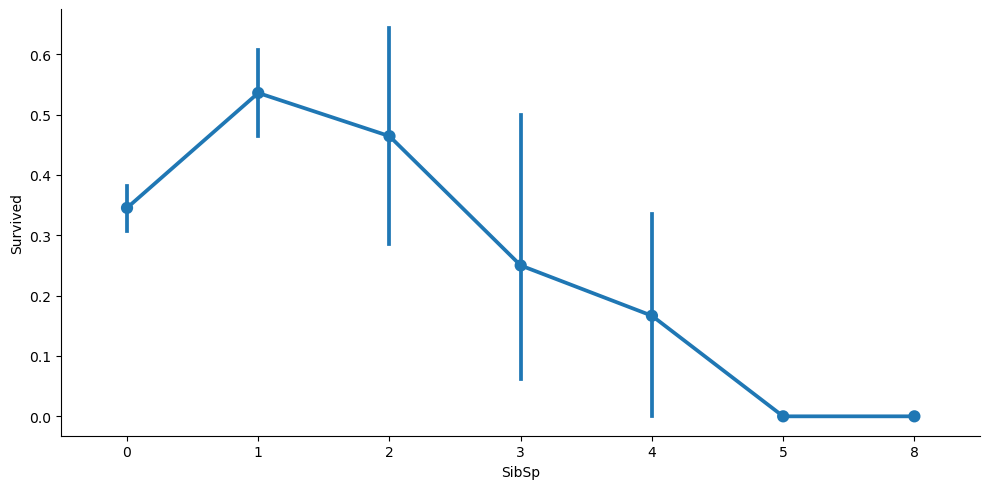

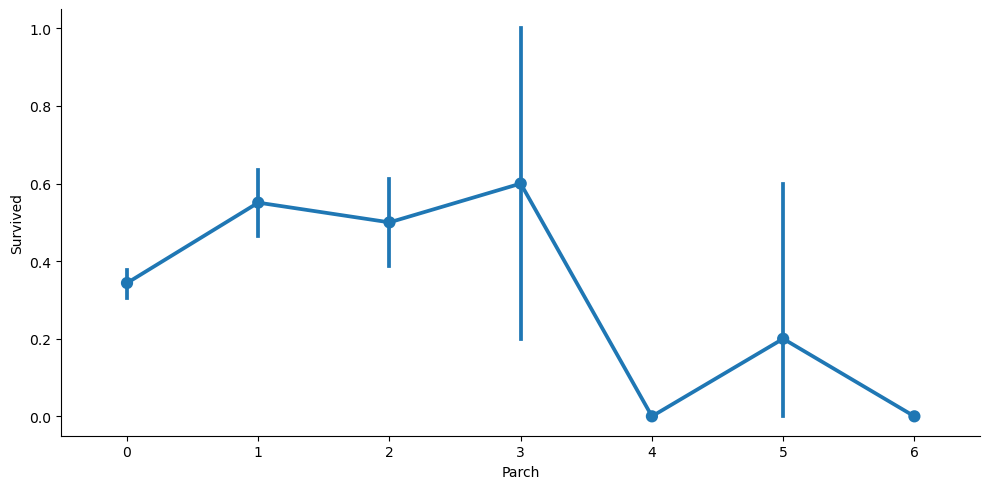

In [5]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )

In [6]:
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']

#### Drop unnnecessary variables

In [7]:
titanic.drop(['PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)

In [8]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


### Clean categorical variables

#### Fill in missing & create indicator for `Cabin`

In [9]:
titanic.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
Ticket          0
Fare            0
Cabin         687
Embarked        2
Family_cnt      0
dtype: int64

In [10]:
titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [11]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0


#### Convert `Sex` to numeric

In [12]:
gender_num = {'male': 0, 'female': 1}

titanic['Sex'] = titanic['Sex'].map(gender_num)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0


#### Drop unnecessary variables

In [13]:
titanic.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


#### Save the cleaned data

In [14]:
titanic.to_csv('data/titanic_cleaned.csv', index=False)

### Split data into train, validation, and test set

In [15]:
features = titanic.drop('Survived', axis=1)
labels = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=123)

In [16]:
#confirm the shape of both data sets and the ratio of classes is the same across both train and test datasets
print("{0:0.2f}% data is in training set".format((len(X_train)/len(titanic.index)) * 100))
print("{0:0.2f}% data is in validation set".format((len(X_val)/len(titanic.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(titanic.index)) * 100))
print('==============')
print("Shape of Training set : ", X_train.shape)
print("Shape of validation set : ", X_val.shape)
print("Shape of test set : ", X_test.shape)
print('==============')
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print('==============')
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print('==============')
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

59.93% data is in training set
19.98% data is in validation set
20.09% data is in test set
Shape of Training set :  (534, 6)
Shape of validation set :  (178, 6)
Shape of test set :  (179, 6)
Percentage of classes in training set:
0    0.606742
1    0.393258
Name: Survived, dtype: float64
Percentage of classes in validation set:
0    0.617978
1    0.382022
Name: Survived, dtype: float64
Percentage of classes in test set:
0    0.642458
1    0.357542
Name: Survived, dtype: float64


### Save the data splitted 

In [17]:
X_train.to_csv('data/splitted/train_features.csv', index=False)
X_val.to_csv('data/splitted/val_features.csv', index=False)
X_test.to_csv('data/splitted/test_features.csv', index=False)

y_train.to_csv('data/splitted/train_labels.csv', index=True)
y_val.to_csv('data/splitted/val_labels.csv', index=True)
y_test.to_csv('data/splitted/test_labels.csv', index=True)

In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(534, 6)
(534,)
(179, 6)
(179,)


## <b>Logistic Regression: Hyperparameters</b>

We will use [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) from `sklearn` and explore the hyperparameters.

In [18]:
from sklearn.linear_model import LogisticRegression

LogisticRegression()

LogisticRegression()

In [19]:
tr_features = pd.read_csv('data/splitted/train_features.csv')
tr_labels = pd.read_csv('data/splitted/train_labels.csv')

<div class="alert alert-block alert-info">
<b>print_results:</b> This function will be used for all our algorithm to print and compare different results from CV.
</div>

In [20]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

### Training

In [26]:
lr = LogisticRegression(max_iter=1000) 
# max_iter=1000: Increase the number of iterations: The default number of iterations for the LogisticRegression 
# function in scikit-learn is max_iter=100. You can increase this number to allow the algorithm more time to 
# converge.

parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 10}

0.68 (+/-0.036) for {'C': 0.001}
0.713 (+/-0.06) for {'C': 0.01}
0.785 (+/-0.05) for {'C': 0.1}
0.798 (+/-0.054) for {'C': 1}
0.8 (+/-0.058) for {'C': 10}
0.8 (+/-0.058) for {'C': 100}
0.8 (+/-0.058) for {'C': 1000}


In [27]:
cv.best_estimator_

LogisticRegression(C=10, max_iter=1000)

### Write out pickled model

In [32]:
joblib.dump(cv.best_estimator_, 'models/LR_model.pkl')

['models/LR_model.pkl']

## <b>Support Vector Machines: Hyperparameters</b>

We will use [Support Vector Machines](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) from `sklearn` and explore the hyperparameters.

In [34]:
SVC()

SVC()

In [35]:
dir(SVC)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_proba',
 '_class_weight',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dense_predict_proba',
 '_estimator_type',
 '_get_coef',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sparse_decision_function',
 '_spars

### Training

In [36]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 0.1, 'kernel': 'linear'}

0.777 (+/-0.078) for {'C': 0.1, 'kernel': 'linear'}
0.663 (+/-0.06) for {'C': 0.1, 'kernel': 'rbf'}
0.777 (+/-0.078) for {'C': 1, 'kernel': 'linear'}
0.667 (+/-0.06) for {'C': 1, 'kernel': 'rbf'}
0.777 (+/-0.078) for {'C': 10, 'kernel': 'linear'}
0.693 (+/-0.051) for {'C': 10, 'kernel': 'rbf'}


In [37]:
cv.best_estimator_

SVC(C=0.1, kernel='linear')

### Write out pickled model

In [38]:
joblib.dump(cv.best_estimator_, 'models/SVM_model.pkl')

['models/SVM_model.pkl']

## <b>Multilayer Perceptron: Hyperparameters</b>

We will use [`MLPClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) and [`MLPRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) from `sklearn` and explore the hyperparameters.

### Training

In [43]:
mlp = MLPClassifier(max_iter=1000)
# max_iter=1000: Increase the Maximum Number of Iterations: You can increase the max_iter parameter for MLPClassifier. 
# This will allow the neural network more iterations to potentially converge

parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv = GridSearchCV(mlp, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'activation': 'tanh', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}

0.777 (+/-0.078) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.762 (+/-0.064) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.783 (+/-0.058) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.77 (+/-0.052) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.758 (+/-0.058) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.773 (+/-0.052) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.773 (+/-0.087) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.773 (+/-0.053) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.773 (+/-0.054) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learn

In [44]:
cv.best_estimator_

MLPClassifier(activation='tanh', hidden_layer_sizes=(10,),
              learning_rate='invscaling', max_iter=1000)

### Write out pickled model

In [45]:
joblib.dump(cv.best_estimator_, 'models/MLP_model.pkl')

['models/MLP_model.pkl']

## <b>Random Forest: Hyperparameters</b>

We will use [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) from `sklearn` and explore the hyperparameters.

### Training

In [48]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 50}

0.777 (+/-0.05) for {'max_depth': 2, 'n_estimators': 5}
0.762 (+/-0.07) for {'max_depth': 2, 'n_estimators': 50}
0.757 (+/-0.052) for {'max_depth': 2, 'n_estimators': 250}
0.783 (+/-0.059) for {'max_depth': 4, 'n_estimators': 5}
0.817 (+/-0.063) for {'max_depth': 4, 'n_estimators': 50}
0.805 (+/-0.072) for {'max_depth': 4, 'n_estimators': 250}
0.785 (+/-0.097) for {'max_depth': 8, 'n_estimators': 5}
0.796 (+/-0.086) for {'max_depth': 8, 'n_estimators': 50}
0.803 (+/-0.09) for {'max_depth': 8, 'n_estimators': 250}
0.764 (+/-0.113) for {'max_depth': 16, 'n_estimators': 5}
0.775 (+/-0.101) for {'max_depth': 16, 'n_estimators': 50}
0.771 (+/-0.09) for {'max_depth': 16, 'n_estimators': 250}
0.753 (+/-0.075) for {'max_depth': 32, 'n_estimators': 5}
0.773 (+/-0.077) for {'max_depth': 32, 'n_estimators': 50}
0.773 (+/-0.089) for {'max_depth': 32, 'n_estimators': 250}
0.777 (+/-0.08) for {'max_depth': None, 'n_estimators': 5}
0.785 (+/-0.09) fo

In [50]:
cv.best_estimator_

RandomForestClassifier(max_depth=4, n_estimators=50)

### Write out pickled model

In [51]:
joblib.dump(cv.best_estimator_, 'models/RF_model.pkl')

['models/RF_model.pkl']

## <b>Boosting: Hyperparameters</b>

We will use [`GradientBoostingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) and [`GradientBoostingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) from `sklearn` and explore the hyperparameters.

### Training

In [54]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}

0.607 (+/-0.003) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.777 (+/-0.078) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.775 (+/-0.078) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.8 (+/-0.058) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.607 (+/-0.003) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.792 (+/-0.091) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.824 (+/-0.079) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.813 (+/-0.085) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.607 (+/-0.003) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.805 (+/-0.052) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.815 (+/-0.048) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.803 (+/-0.055) for {'learning_ra

In [58]:
cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, n_estimators=250)

### Write out pickled model

In [59]:
joblib.dump(cv.best_estimator_, 'models/GB_model.pkl')

['models/GB_model.pkl']

## <b>Summary: Compare model results and final model selection</b>

In this section, we will do the following:
1. Evaluate all of our saved models on the validation set
2. Select the best model based on performance on the validation set
3. Evaluate that model on the holdout test set

### Load and read in Models

In [60]:
models = {}

for mdl in ['LR', 'SVM', 'MLP', 'RF', 'GB']:
    models[mdl] = joblib.load('models/{}_model.pkl'.format(mdl))

In [61]:
models

{'LR': LogisticRegression(C=10, max_iter=1000),
 'SVM': SVC(C=0.1, kernel='linear'),
 'MLP': MLPClassifier(activation='tanh', hidden_layer_sizes=(10,),
               learning_rate='invscaling', max_iter=1000),
 'RF': RandomForestClassifier(max_depth=4, n_estimators=50),
 'GB': GradientBoostingClassifier(learning_rate=0.01, n_estimators=250)}

### Evaluate models on the validation set

In [62]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [68]:
for name, mdl in models.items():
    evaluate_model(name, mdl, X_val, y_val)

LR -- Accuracy: 0.831 / Precision: 0.788 / Recall: 0.765 / Latency: 3.0ms
SVM -- Accuracy: 0.809 / Precision: 0.783 / Recall: 0.691 / Latency: 6.2ms
MLP -- Accuracy: 0.826 / Precision: 0.776 / Recall: 0.765 / Latency: 4.1ms
RF -- Accuracy: 0.865 / Precision: 0.893 / Recall: 0.735 / Latency: 15.0ms
GB -- Accuracy: 0.86 / Precision: 0.877 / Recall: 0.735 / Latency: 5.3ms


### Observation and Insight

- *__Accuracy__*: Random Forest (RF) exhibits the highest accuracy at 0.865, closely followed by Gradient Boosting (GB) at 0.86. The lowest accuracy is observed in the SVM model (0.809).

- *__Precision__*: RF also leads in terms of precision with a value of 0.893. This means that out of all the passengers the model predicted would survive, 89.3% of them truly survived. GB trails close behind with 0.877. The MLP and SVM models display nearly comparable precision values, hovering around 0.78.

- *__Recall__*: Linear Regression (LR) and MLP both exhibit a recall of 0.765, the highest among the models. Recall indicates the proportion of actual survivors that were correctly predicted by the model. Both RF and GB have the same recall values of 0.735, which, although slightly lower than LR and MLP, is still considerably high.

- *__Latency__*: RF, while being the most accurate, also has the highest latency at 15.0ms, which might be an important consideration if real-time prediction is a requirement. On the other end, LR offers the quickest prediction time, followed closely by GB.

**Model Recommendations:**

- **Best Overall Model**: Based on the combined evaluation of accuracy, precision, recall, and latency, the `Random Forest (RF)` seems to be the most promising model. It offers the highest accuracy and precision among all models, indicating robust performance. However, it's worth noting that it also has the highest latency.

- **Model for Real-time Predictions**: If you are seeking quicker predictions with decent performance, `Gradient Boosting (GB)` is a favorable choice. It offers high accuracy, precision, and recall, with much lower latency than RF.

**Trade-offs to Consider:**

- If recall is of paramount importance (i.e., you want to ensure the maximum number of actual survivors are correctly predicted), Linear Regression or MLP might be preferable.
- If prediction speed (latency) is crucial, especially in a real-time scenario, RF might not be the best choice despite its accuracy and precision advantages.

>In conclusion, the optimal model largely depends on the specific requirements and constraints of your project. If the highest accuracy and precision are your primary goals, RF stands out. However, if there's a need for a balance between speed and performance, GB is a commendable alternative.

### Evaluate best model on test set

In [70]:
evaluate_model('Random Forest', models['RF'], X_train, y_train)

Random Forest -- Accuracy: 0.85 / Precision: 0.892 / Recall: 0.705 / Latency: 18.1ms


## <b>**Visualizing the metrics**</b>

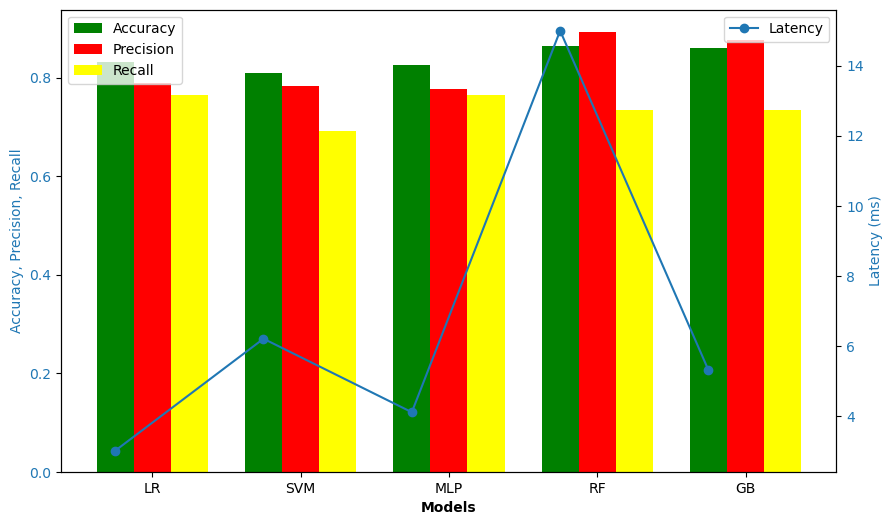

In [73]:
models = ['LR', 'SVM', 'MLP', 'RF', 'GB']
accuracy = [0.831, 0.809, 0.826, 0.865, 0.86]
precision = [0.788, 0.783, 0.776, 0.893, 0.877]
recall = [0.765, 0.691, 0.765, 0.735, 0.735]
latency = [3.0, 6.2, 4.1, 15.0, 5.3]

# Plotting Bars for Accuracy, Precision, and Recall
barWidth = 0.25
r1 = range(len(accuracy))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

fig, ax1 = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax1.set_xlabel('Models', fontweight='bold')
ax1.set_ylabel('Accuracy, Precision, Recall', color=color)
ax1.bar(r1, accuracy, width=barWidth, label='Accuracy', color='green')
ax1.bar(r2, precision, width=barWidth, label='Precision', color='red')
ax1.bar(r3, recall, width=barWidth, label='Recall', color='yellow')
ax1.tick_params(axis='y', labelcolor=color)

# Setting the X-axis tick positions to the center of the grouped bars
ax1.set_xticks([r + barWidth for r in range(len(accuracy))])
ax1.set_xticklabels(models)

# Plotting Line for Latency
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(models, latency, label='Latency', color=color, marker='o')
ax2.set_ylabel('Latency (ms)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()
